In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

df.head() #Preview

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
#statistical summary
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [3]:
#Check for missing data
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['population']] = scaler.fit_transform(df[['Population']])
df[['AveRooms']] = scaler.fit_transform(df[['AveRooms']])
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,population
0,8.3252,41.0,0.043512,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.008941
1,8.3014,21.0,0.038224,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.067210
2,7.2574,52.0,0.052756,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.013818
3,5.6431,52.0,0.035241,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.015555
4,3.8462,52.0,0.038534,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.015752


In [9]:
df['Age_Cat'] = pd.cut(df['HouseAge'], bins=[20, 30, 40, 50], labels=['New', 'Old', 'Very Old'])

df = pd.get_dummies(df, columns=['Age_Cat'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,population,Age_Cat_New,Age_Cat_Old,Age_Cat_Very Old,Age_Cat_New,Age_Cat_Old,Age_Cat_Very Old
0,8.3252,41.0,0.043512,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.008941,False,False,True,False,False,True
1,8.3014,21.0,0.038224,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.067210,True,False,False,True,False,False
2,7.2574,52.0,0.052756,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.013818,False,False,False,False,False,False
3,5.6431,52.0,0.035241,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.015555,False,False,False,False,False,False
4,3.8462,52.0,0.038534,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.015752,False,False,False,False,False,False


In [10]:
#correlation matrix
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,population,Age_Cat_New,Age_Cat_Old,Age_Cat_Very Old,Age_Cat_New,Age_Cat_Old,Age_Cat_Very Old
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,0.004834,0.000204,-0.031212,-0.092496,0.000204,-0.031212,-0.092496
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,-0.296244,-0.134196,0.314811,0.477597,-0.134196,0.314811,0.477597
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,-0.072213,-0.003150,-0.060854,-0.081871,-0.003150,-0.060854,-0.081871
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,-0.066197,-0.000299,-0.043645,-0.034648,-0.000299,-0.043645,-0.034648
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,1.000000,0.045978,-0.118945,-0.125215,0.045978,-0.118945,-0.125215
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,0.069863,-0.006325,0.006313,0.019211,-0.006325,0.006313,0.019211
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,-0.108785,-0.013741,-0.093147,-0.014968,-0.013741,-0.093147,-0.014968
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,0.099773,0.013020,0.062882,-0.023087,0.013020,0.062882,-0.023087
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,-0.024650,-0.000261,-0.001026,-0.003244,-0.000261,-0.001026,-0.003244
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,1.000000,0.045978,-0.118945,-0.125215,0.045978,-0.118945,-0.125215


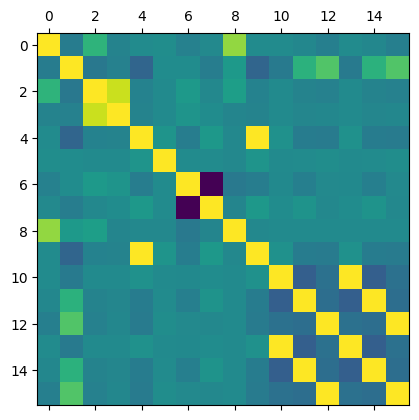

In [12]:
import matplotlib.pyplot as plt
plt.matshow(df.corr(), cmap='viridis',label=True, fignum=1)

In [ ]:
data=df.groupby('Income').mean()['Target']
data.plot.line(title='Income vs Target', xlabel='Income', ylabel='Target',marker='o')